In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

In [2]:
params = {
            'axes.labelsize': '16',
            'xtick.labelsize': '16',
            'ytick.labelsize': '13',
            'lines.linewidth': '2',
            'legend.fontsize': '20',
            'figure.figsize': '26, 24'  # set figure size
        }
pylab.rcParams.update(params)

In [3]:
# img_gray used to process
img_gray = cv2.imread('../data/handwrt_data/test.png',0)
# img_show used to show the final results
img_show = cv2.imread('../data/handwrt_data/test.png')
img_gray = cv2.resize(img_gray, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
img_show = cv2.resize(img_show, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

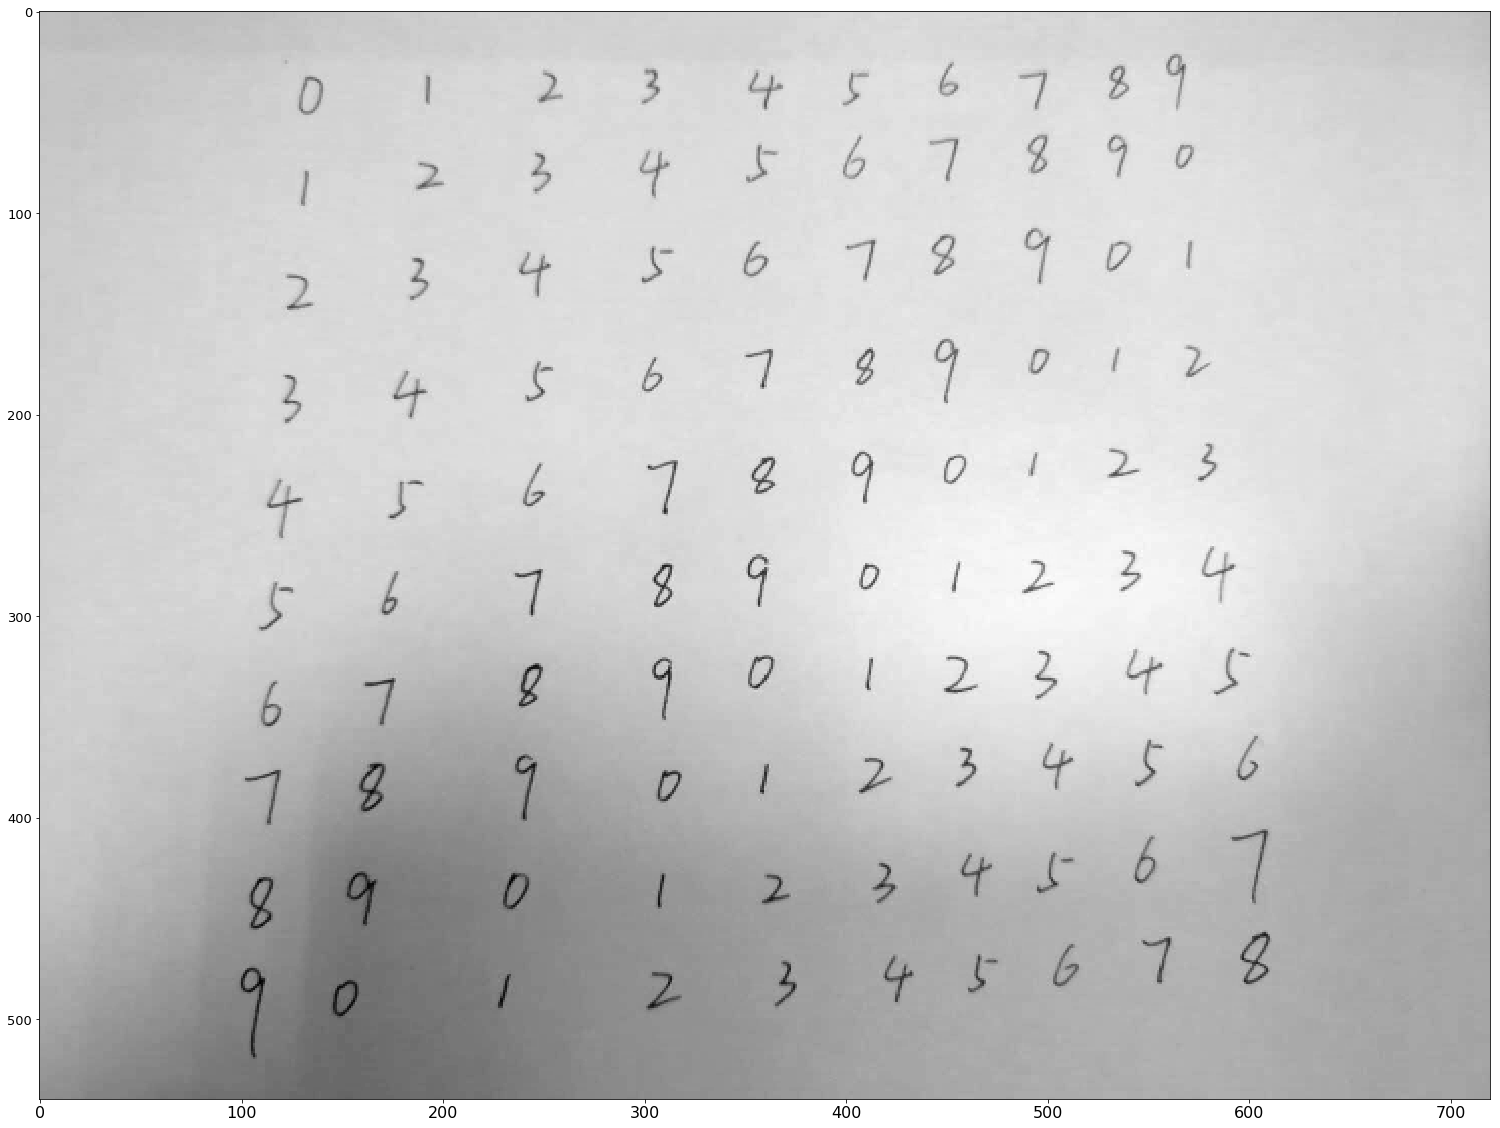

In [4]:
plt.imshow(img_gray, 'gray')

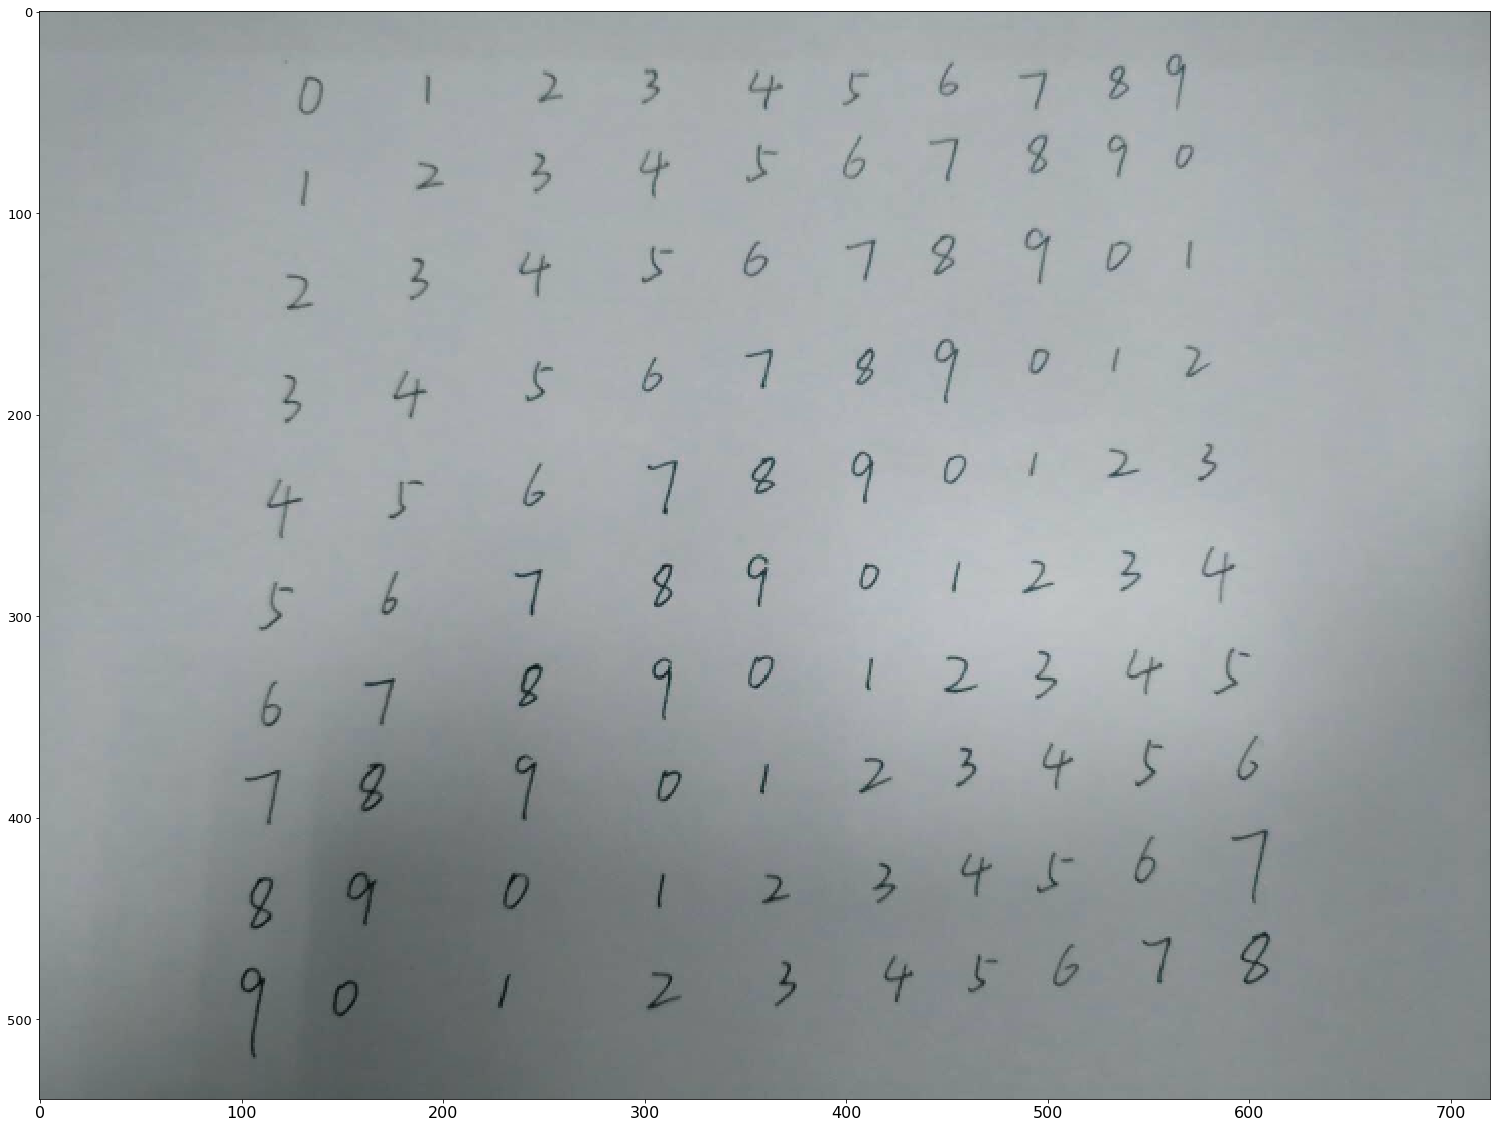

In [5]:
plt.imshow(img_show)

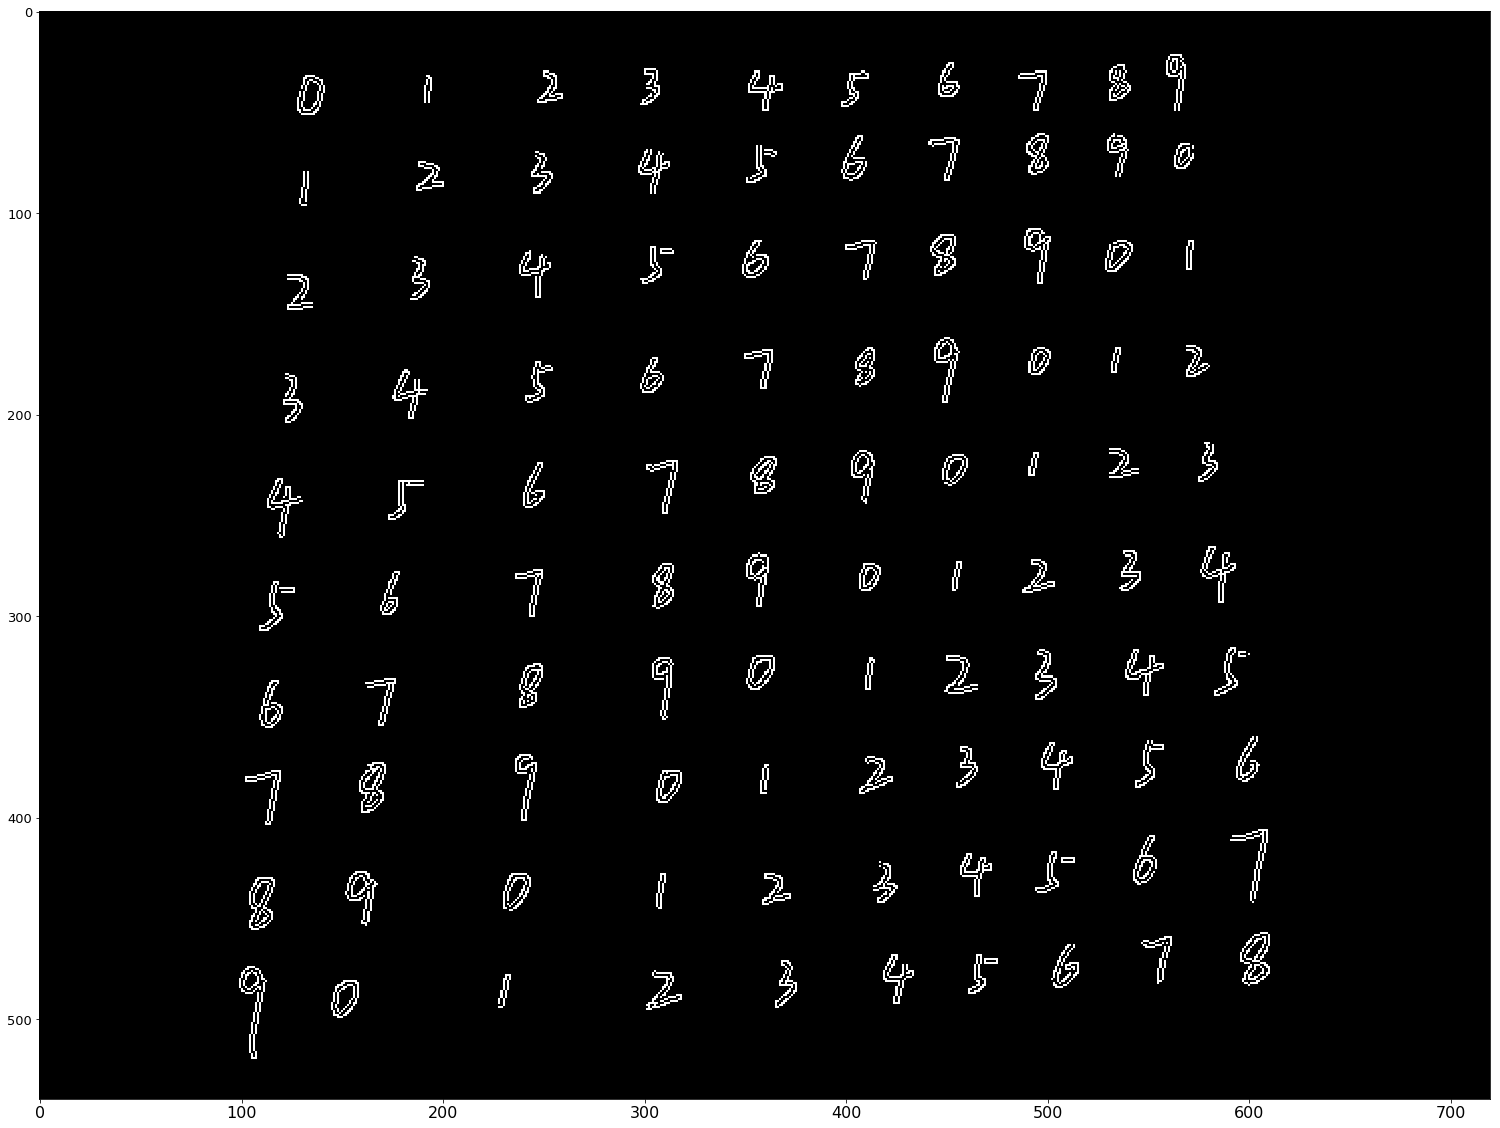

In [6]:
edges_gray = cv2.Canny(img_gray,80,220)
plt.imshow(edges_gray,'gray')

In [7]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(edges_gray, kernel, iterations=1)

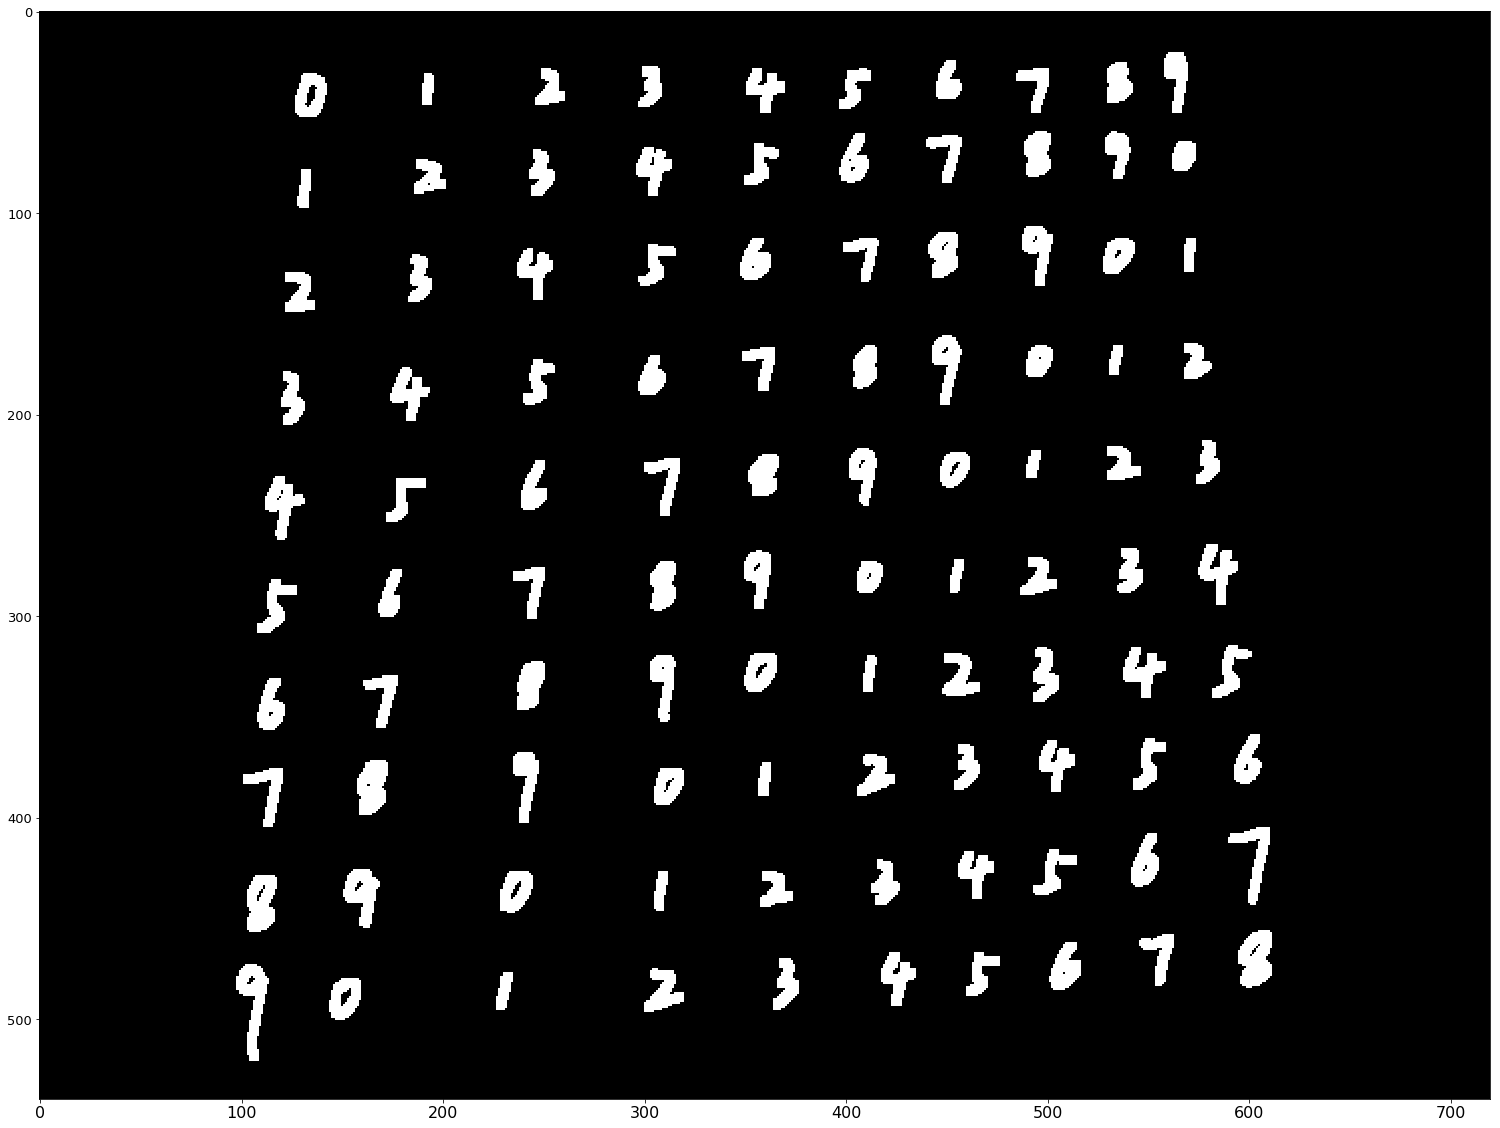

In [8]:
plt.imshow(dilation, 'gray')

In [9]:
img_canny, cnt_canny, _ = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
bound = []
for cnt in cnt_canny:
    x, y, w, h = cv2.boundingRect(cnt)
    #print(x,y,w,h)
    cv2.rectangle(img_show,(x,y),(x+w,y+h),(0,255,0),2)
    bound.append(img_gray[y:y+h,x:x+w])
    #plt.subplot(4,11,i),plt.imshow(edges[x:x+w,y:y+h],'gray')
#plt.show()

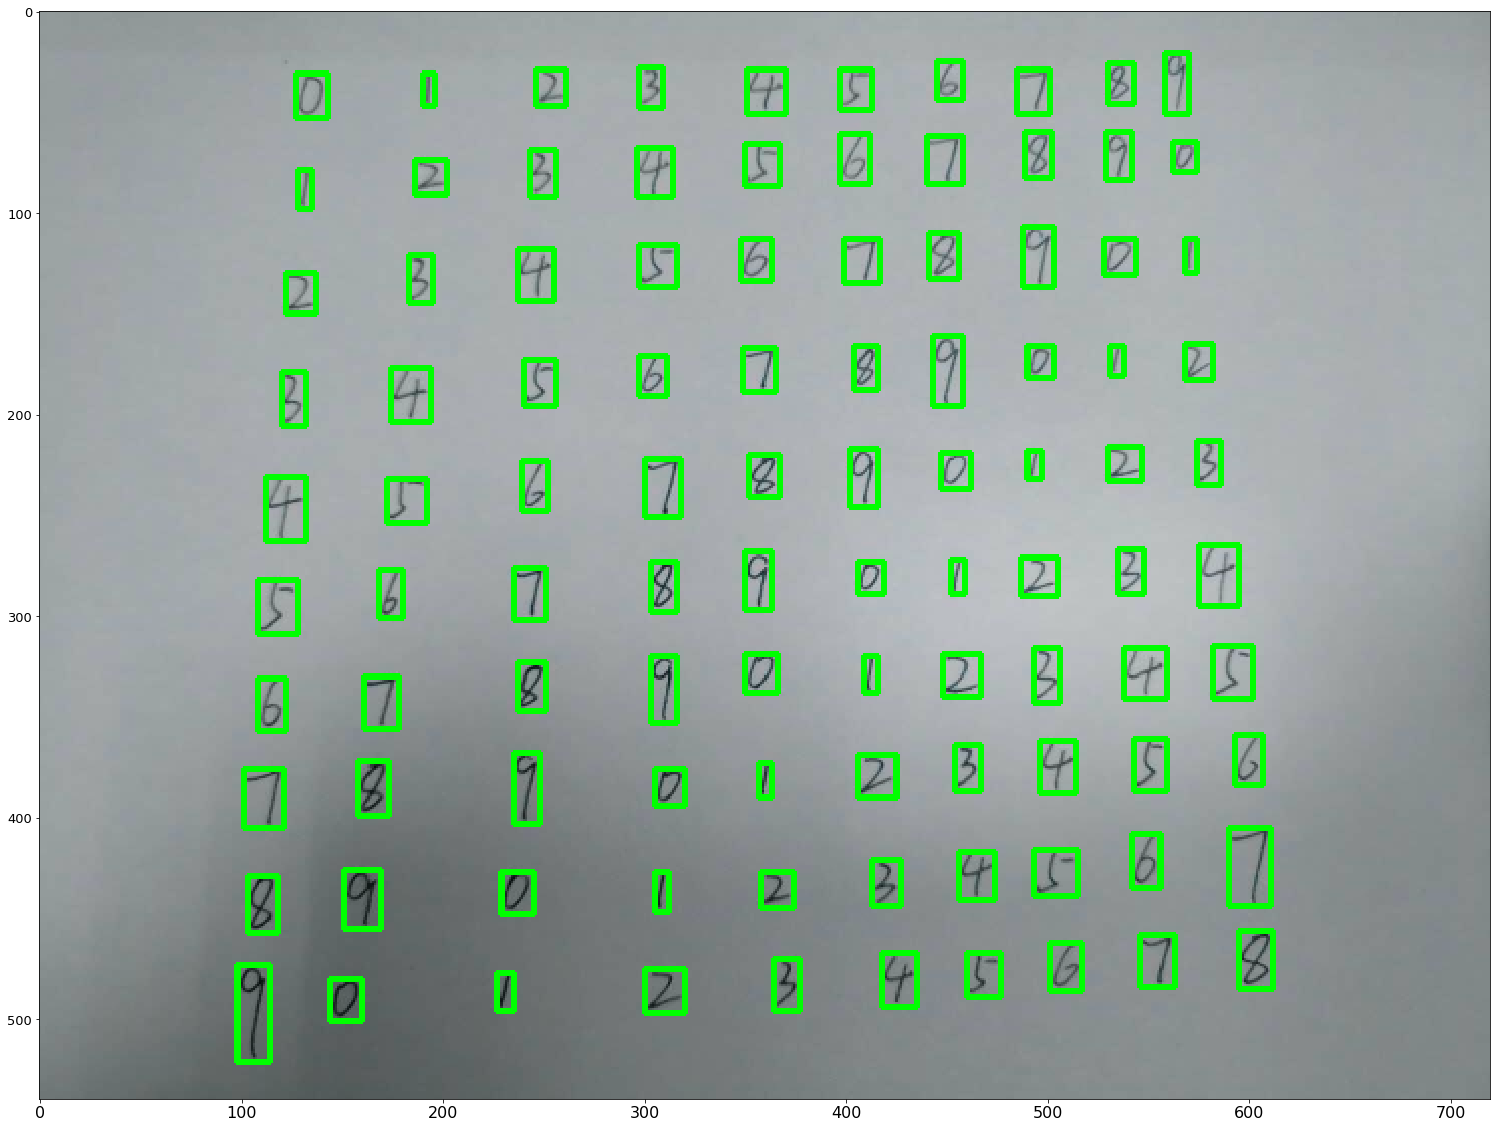

In [11]:
plt.imshow(img_show)

In [12]:
for i, img in enumerate(bound):
    filename = '../data/extract_nums/ori_num/' + str(i) + '.png'
    cv2.imwrite(filename,img)

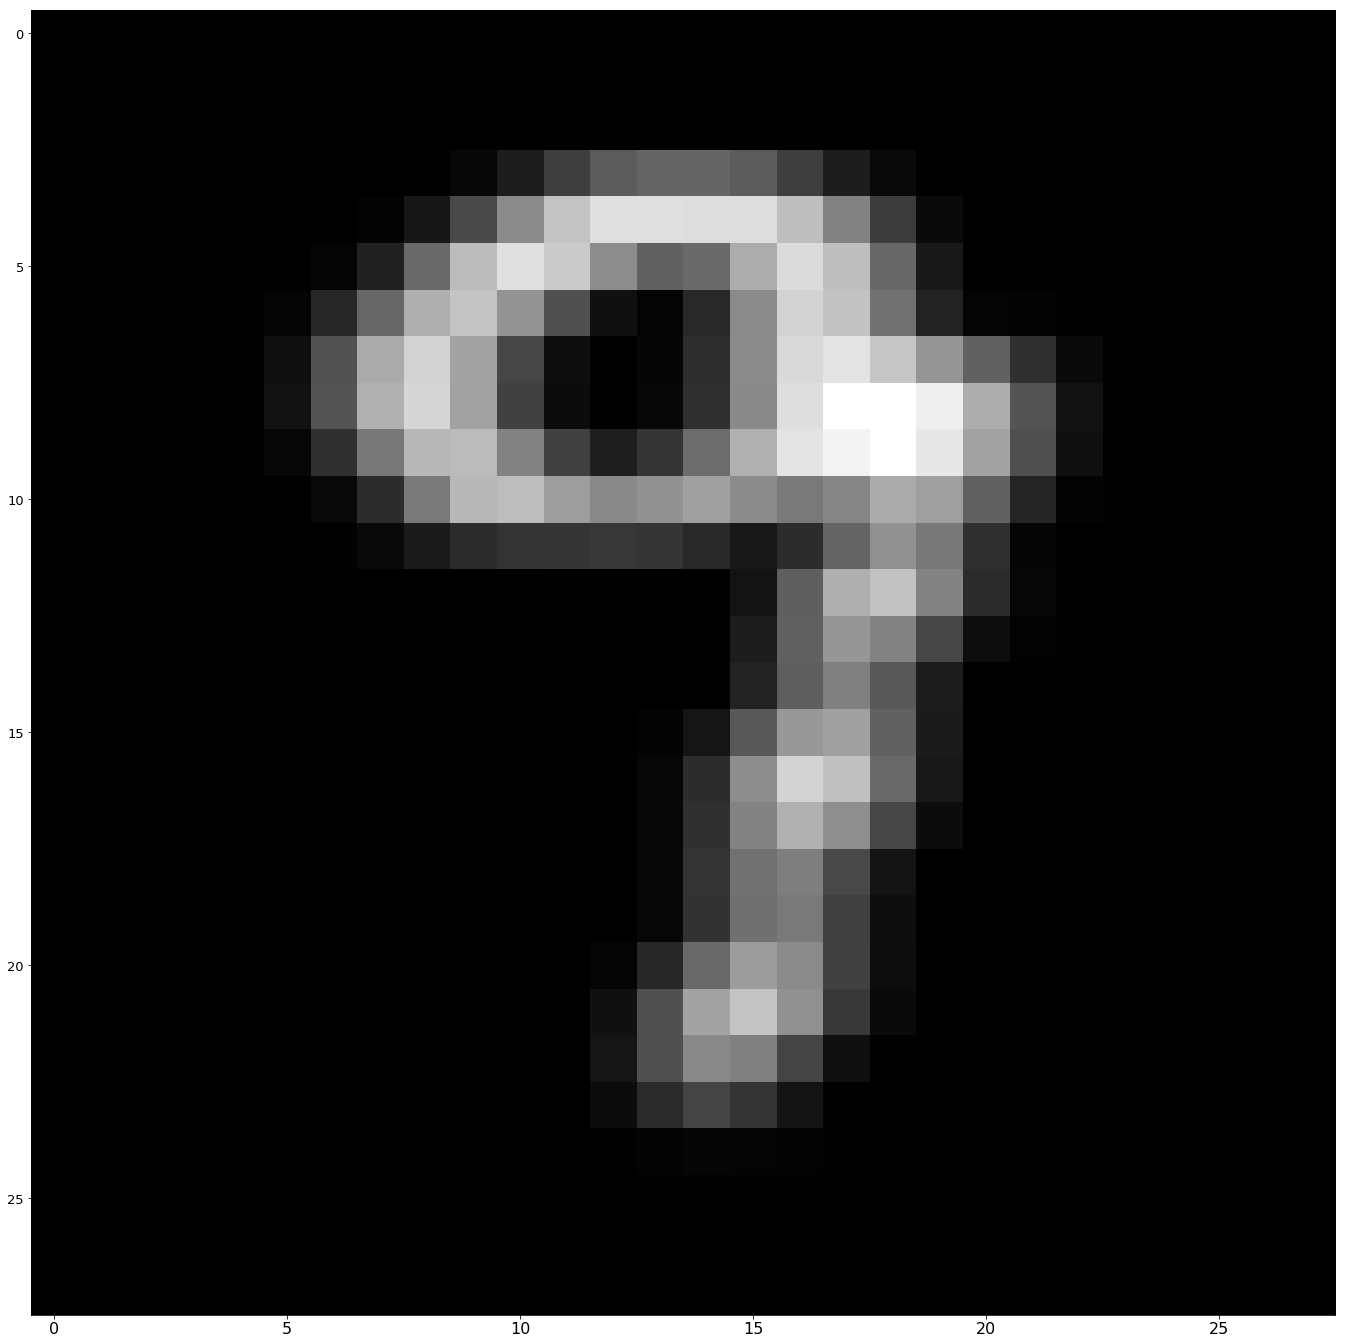

In [13]:
for i, img in enumerate(bound):
    img_gaus = cv2.GaussianBlur(img, (3, 3), 0)
    ret_gaus, thresh_gaus = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    im = cv2.bitwise_not(thresh_gaus)
    hor = im.shape[1]//3
    ver = im.shape[0]//7
    im = cv2.copyMakeBorder(im,ver,ver,hor,hor,cv2.BORDER_CONSTANT,value=0)
    
    im = cv2.GaussianBlur(im,(3,3),0)
    im = cv2.resize(im, (28,28), interpolation = cv2.INTER_CUBIC)
    plt.imshow(im,'gray')
    savename = '../data/extract_nums/processed_num/' + str(i) + '.png'
    cv2.imwrite(savename, im)